In [74]:
from PIL import Image
import math

In [2]:
im = Image.open("CRC2.png")

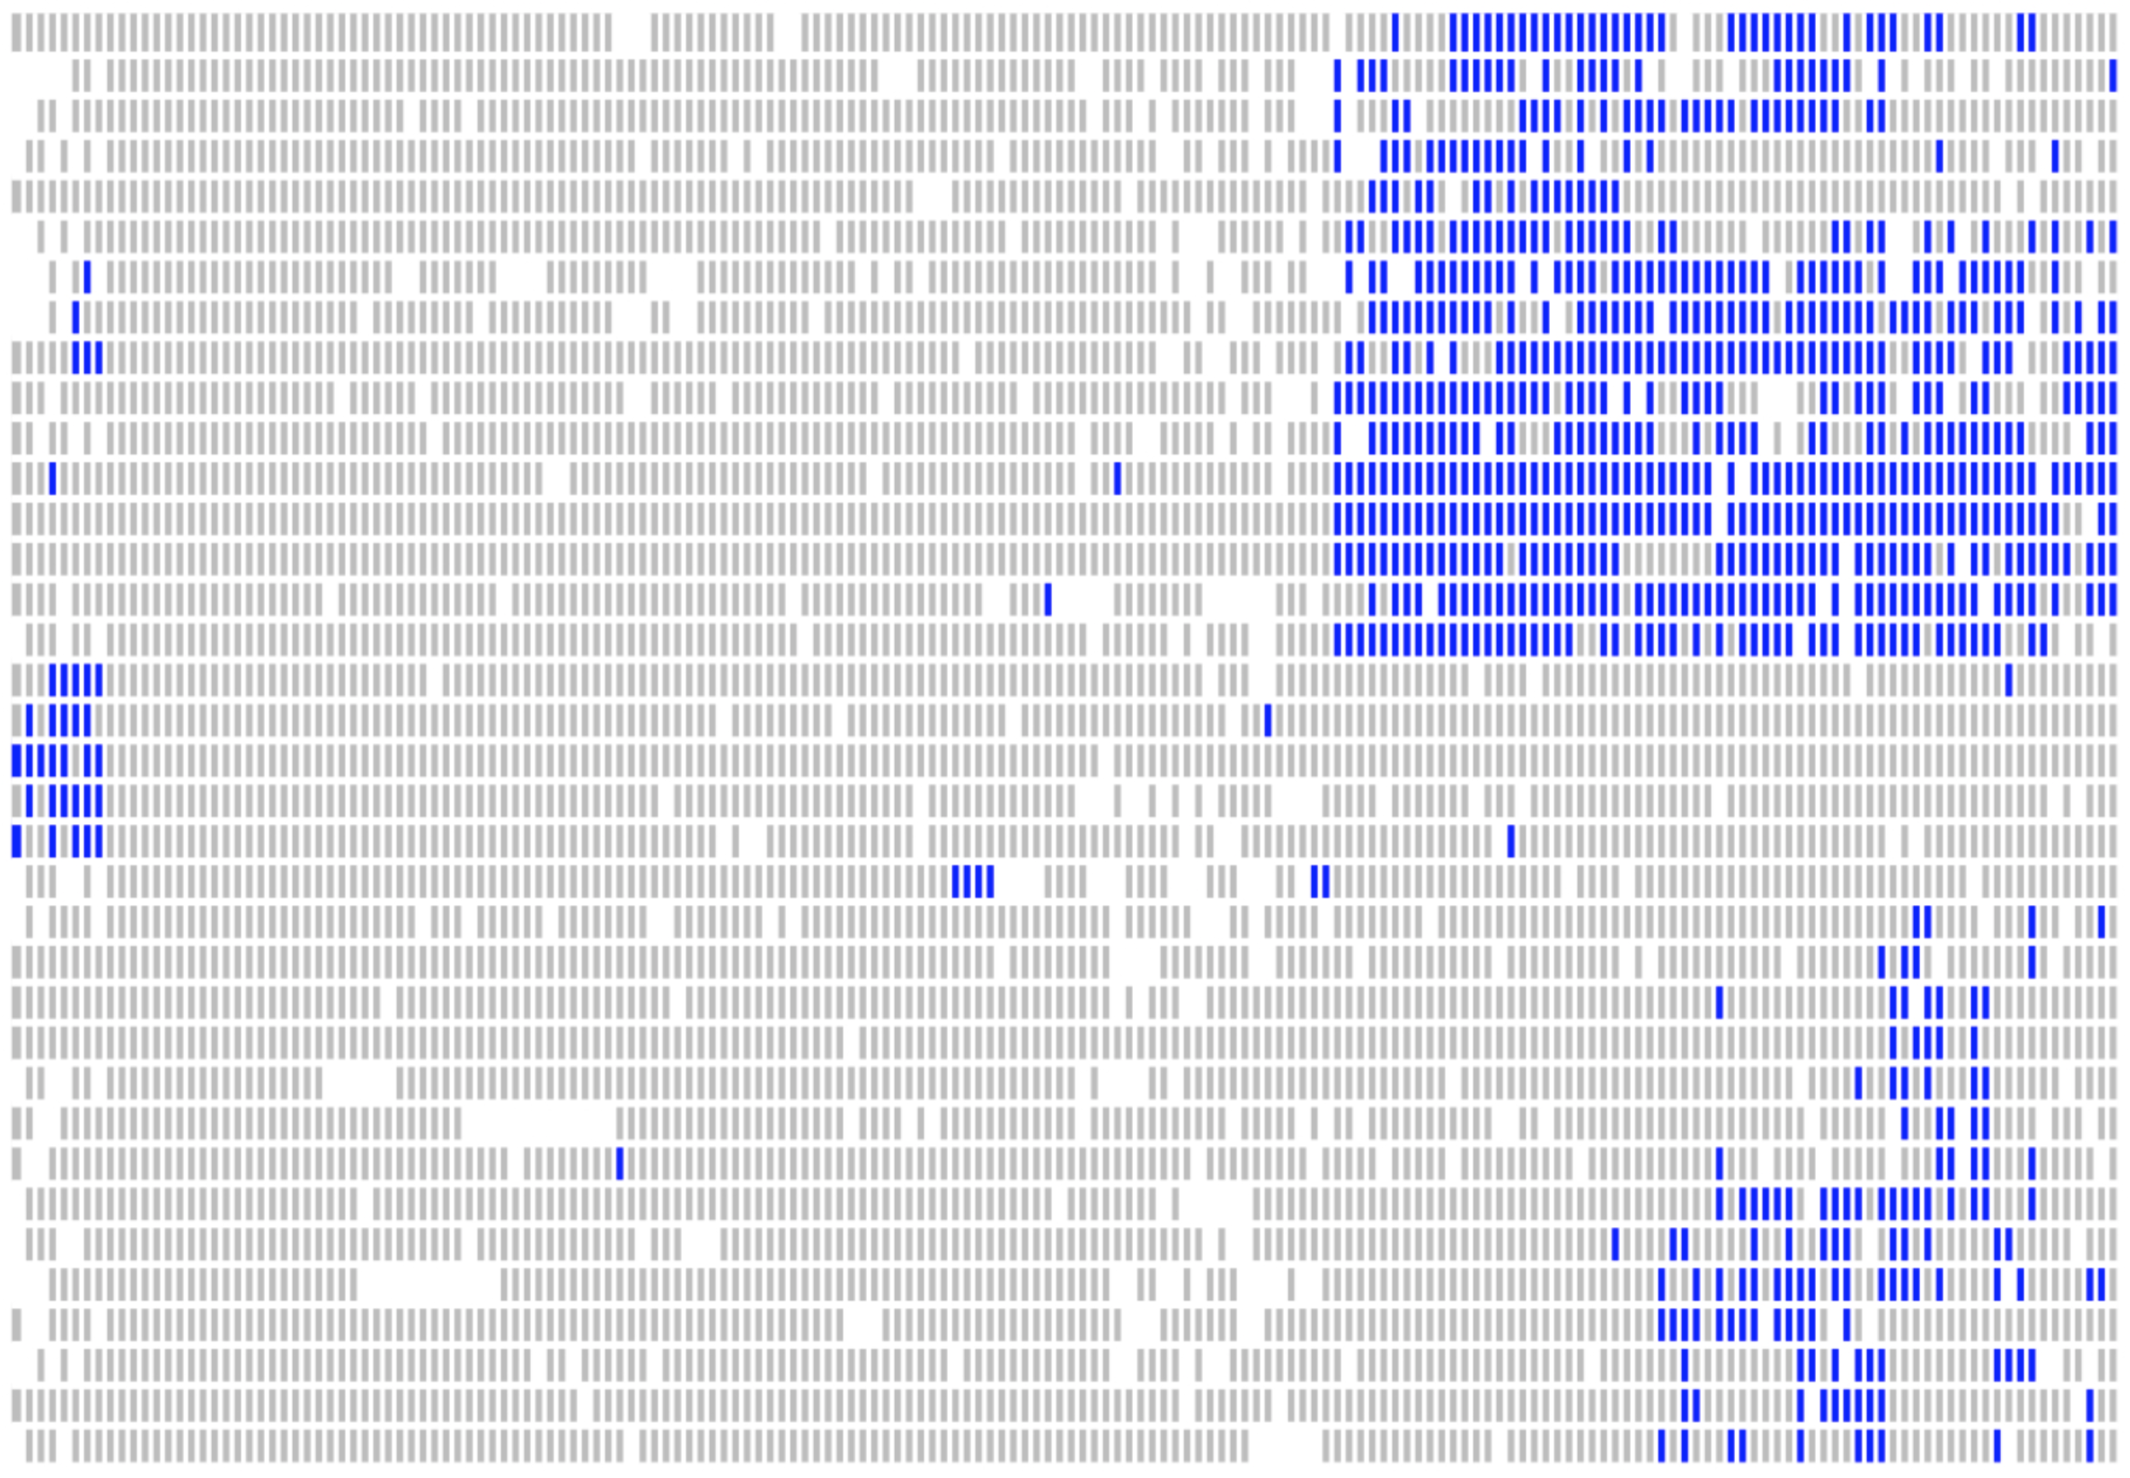

In [3]:
im

# CRC2

In [ ]:
m = 182
n = 

# CRC1

In [106]:
m = 178
n = 16

In [118]:
im = Image.open("CRC1.png")

In [119]:
pix = im.load() 

In [141]:
offset_x = 100
offset_y = 122
width_x = 33
width_y = 12.8
B_SCITE = [ [ 0 for c in range(n)] for p in range(m) ]
D = [ [ 0 for c in range(n)] for p in range(m) ]

GRAY = (210,210,210,255)
WHITE = (255,255,255,255)
PURPLE = (146,148,181,255)
BLUE = (0,82,255,255)
PINK = (199,118,165,255)
delta = 10

for p in range(m):
    for c in range(n):
        (r,g,b,a) = pix[offset_x + round(c*width_x), offset_y + p*width_y]
        if r in range(GRAY[0] - delta, GRAY[0] + delta) \
            and g in range(GRAY[1] - delta, GRAY[1] + delta) \
            and b in range(GRAY[2] - delta, GRAY[2] + delta):
            D[p][c] = B_SCITE[p][c] = 0
        elif r in range(WHITE[0] - delta, WHITE[0] + delta) \
            and g in range(WHITE[1] - delta, WHITE[1] + delta) \
            and b in range(WHITE[2] - delta, WHITE[2] + delta):
            D[p][c] = -1
            B_SCITE[p][c] = 0
        elif r in range(PURPLE[0] - delta, PURPLE[0] + delta) \
            and g in range(PURPLE[1] - delta, PURPLE[1] + delta) \
            and b in range(PURPLE[2] - delta, PURPLE[2] + delta):
            # FP
            D[p][c] = 1
            B_SCITE[p][c] = 0
        elif r in range(BLUE[0] - delta, BLUE[0] + delta) \
            and g in range(BLUE[1] - delta, BLUE[1] + delta) \
            and b in range(BLUE[2] - delta, BLUE[2] + delta):
            # TP
            D[p][c] = B_SCITE[p][c] = 1
        elif r in range(PINK[0] - delta, PINK[0] + delta) \
            and g in range(PINK[1] - delta, PINK[1] + delta) \
            and b in range(PINK[2] - delta, PINK[2] + delta):
            # FN
            D[p][c] = 0
            B_SCITE[p][c] = 1
        elif (r,g,b,a) == (0,0,0,255):
            D[p][c] = -1
            B_SCITE[p][c] = 1
        else:
            print p, c, r, g, b, a

In [142]:
SNV_labels = ["GATA1", "RBFOX1", "TRRAP", "EYS", "ZNF521", "TPM4", "POU2AF1", "TCF7L2", 
              "TDRP", "MYH9", "ROBO2", "FAT3", "CCNE1", "TP53", "KRAS", "APC"]
cell_labels = ["MD_2","MD_19","MD_21","MD_23","MD_22","MD_25","MD_3","MD_4","MD_5","MD_6","MD_8","MD_9","MD_16",
               "MD_15","MD_14","MD_13","PD_13","PD_27","PD_28","PD_32","PD_37","PD_38","PD_39","PD_40","PDD_1",
               "PDD_10","PDD_11","PDD_12","PDD_13","PDD_14","PDD_15","PDD_16","PDD_17","PDD_18","PDD_19","PDD_2",
               "PDD_20","PDD_22","PDD_23","PDD_24","PDD_25","PDD_26","PDD_27","PDD_28","PDD_3","PDD_30","PDD_31",
               "PDD_32","PDD_33","PDD_34","PDD_35","PDD_36","PDD_37","PDD_38","PDD_39","PDD_4","PDD_40","PDD_41",
               "PDD_42","PDD_43","PDD_44","PDD_45","PDD_46","PDD_47","PDD_48","PDD_49","PDD_5","PDD_50","PDD_51",
               "PDD_52","PDD_53","PDD_54","PDD_55","PDD_56","PDD_57","PDD_58","PDD_59","PDD_6","PDD_60","PDD_61",
               "PDD_62","PDD_63","PDD_64","PDD_65","PDD_66","PDD_67","PDD_68","PDD_69","PDD_7","PDD_70","PDD_71",
               "PDD_72","PDD_73","PDD_74","PDD_75","PDD_76","PDD_77","PDD_78","PDD_79","PDD_8","PDD_82","PDD_83",
               "PDD_84","PDD_85","PDD_86","PDD_87","PDD_88","PDD_89","PDD_9","PDD_90","PDD_91","PDD_92","MA_63",
               "PD_16","PD_41","PDD_93","PD_30","MD_1","MD_10","MD_20","PA_77","PA_66","PD_26","PA_75","MA_55",
               "PDD_94","PA_70","PA_76","PA_81","PA_83","PA_57","PA_51","PA_54","PA_88","PA_91","PA_74","PA_80",
               "PA_64","PA_65","PA_61","PA_62","PA_85","PA_90","PD_19","PD_44","MA_74","MA_49","MA_53","MA_77",
               "MA_76","MA_58","MA_64","MA_75","MA_50","MA_51","MA_52","MA_54","MA_56","MA_57","MA_62","MA_65",
               "MA_66","MA_67","MA_68","MA_69","MA_73","MD_7","MA_61","MA_59","PA_78","PA_63","PA_50","PA_52",
               "PA_53","PA_56","PA_87","PA_89","PD_31"]

In [143]:
with open("CRC1.SCITE.B", "w") as f:
    f.write("%d #cells\n" % m)
    f.write("%d #SNVs\n" % n)
    for p in range(m):
        f.write("%s\n" % " ".join(map(str, B_SCITE[p])))

In [144]:
with open("CRC1.input", "w") as f:
    f.write("%d #cells\n" % m)
    f.write("%d #SNVs\n" % n)
    for p in range(m):
        f.write("%s\n" % " ".join(map(str, D[p])))

In [146]:
with open("CRC1_SNV.labels", "w") as f:
    for c in range(n):
        f.write("%s\n" % SNV_labels[c])

In [147]:
with open("CRC1_cell.labels", "w") as f:
    for p in range(m):
        f.write("%s\n" % cell_labels[p])

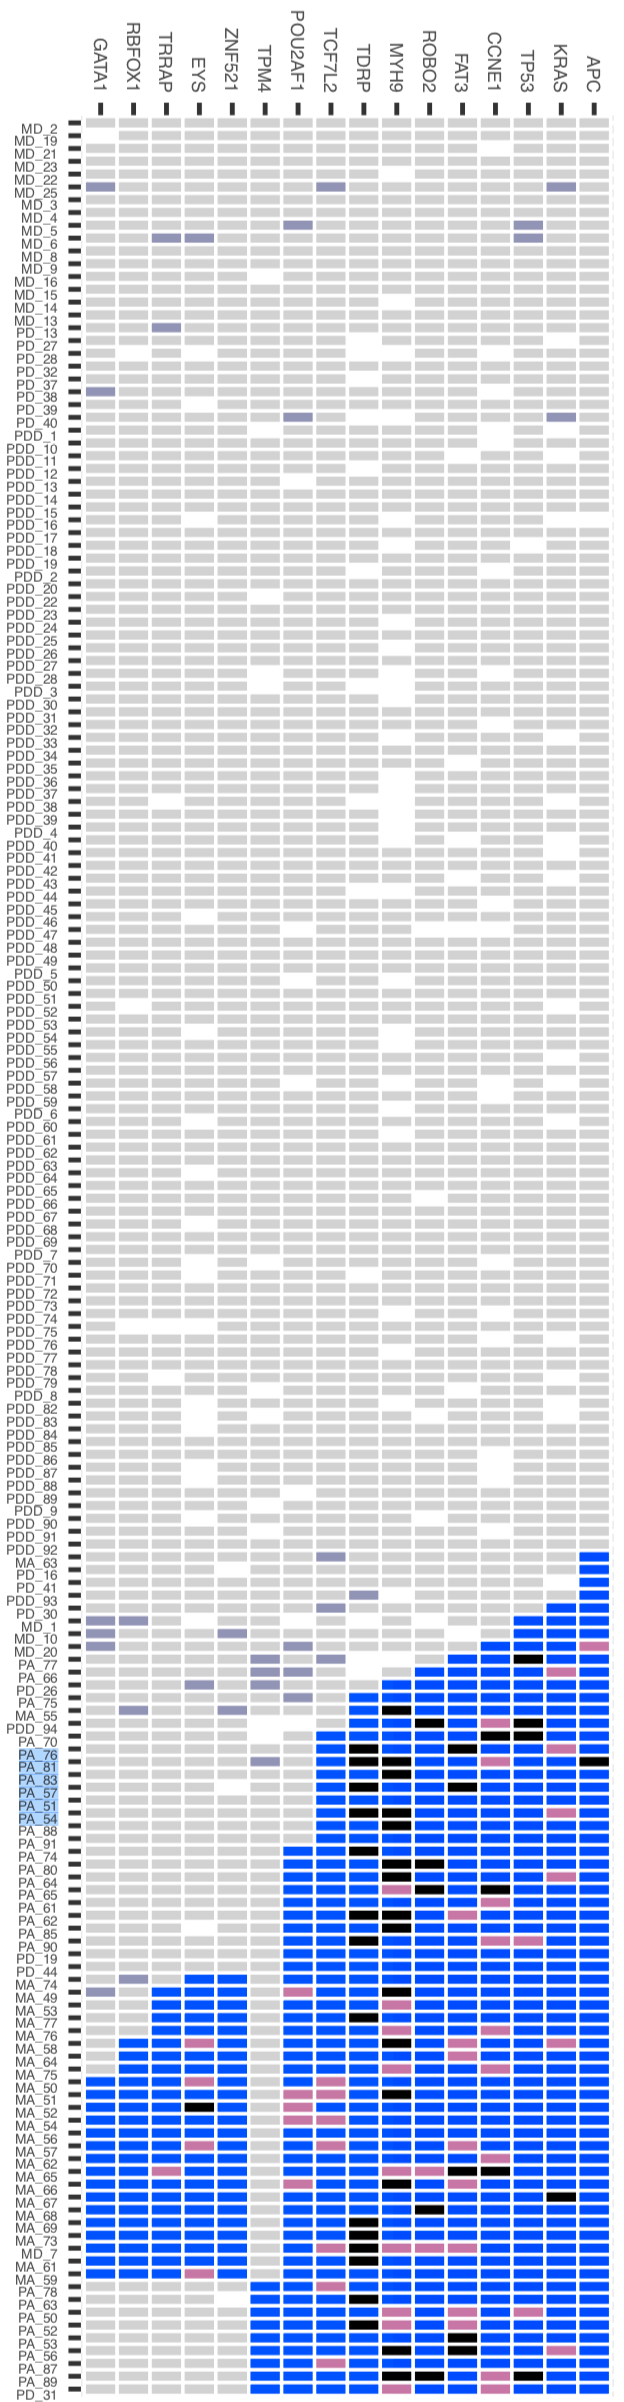

In [123]:
im

In [160]:
flip10 = 0
flip01 = 0
flipx1 = 0
flipx0 = 0
for p in range(m):
    for c in range(n):
        if D[p][c] == 1 and B_SCITE[p][c] == 0:
            flip10 += 1
        if D[p][c] == 0 and B_SCITE[p][c] == 1:
            flip01 += 1
        if D[p][c] == -1 and B_SCITE[p][c] == 0:
            flipx0 += 1
        if D[p][c] == -1 and B_SCITE[p][c] == 1:
            flipx1 += 1

In [158]:
flip10

33

In [159]:
flip01

54

In [161]:
flipx1

49

In [162]:
flipx0

142